<a href="https://colab.research.google.com/github/jouwallace/regresssao-logistica-diagnostico-de-cancer-de-mama/blob/main/Projeto_de_regress%C3%A3o_log%C3%ADstica_(Jhonney).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando as bibliotecas necessarias
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install scikit-learn

warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
# carregando o dataframe:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRB1vVzpRHjYzNmcheYreWI17Z8QWEjNKGPOxP7GpAFSIONHLCjFHclECIl91gYhliwyrP9Gs2qtB9m/pub?gid=284091787&single=true&output=csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,1.184,2.776,3.001,1.471,...,25.38,17.33,184.60,2019.0,1.622,6.656,7.119,2.654,4.601,1.189
1,842517,M,20.57,17.77,132.90,1326.0,8.474,7.864,869.000,7.017,...,24.99,23.41,158.80,1956.0,1.238,1.866,2.416,186.000,275.000,8.902
2,84300903,M,19.69,21.25,130.00,1203.0,1.096,1.599,1.974,1.279,...,23.57,25.53,152.50,1709.0,1.444,4.245,4.504,243.000,3.613,8.758
3,84348301,M,11.42,20.38,77.58,386.1,1.425,2.839,2.414,1.052,...,14.91,26.50,98.87,567.7,2.098,8.663,6.869,2.575,6.638,173.000
4,84358402,M,20.29,14.34,135.10,1297.0,1.003,1.328,198.000,1.043,...,22.54,16.67,152.20,1575.0,1.374,205.000,0.400,1.625,2.364,7.678


In [ ]:
# mostrando as informações do dataframe:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.shape

(569, 32)

In [ ]:
# transformar os resultados maligno e benigno em numeros binarios, true or false: Benigno será igual a 0 e maligno será igual a 1.
df.replace({"diagnosis": {"B": "0", "M": "1"}}, inplace=True)

In [ ]:
#tirando id da coluna para treinamento e teste
df.drop(columns = ['id'], inplace=True)

In [ ]:
# Remover diagnosis e adcionando ela a tabela y (separar quem é X e y)
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']  # Define y como a coluna 'diagnosis'

# caso eu queira ver as tabelas separadas de x ou y:
# print(f'Mostrando as tabelas independentes(variável x): \n\n {x}')
# print(f'\n\nMostrando a tabela independente(variável y): {y}')

In [ ]:
# mudando o tipo de variavel de diagnosis
df['diagnosis'] = df['diagnosis'].astype(float)

In [ ]:
#vendo se diagnosis esta do tipo float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    float64
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
#coorelação
correlation = df.corr()

<Axes: >

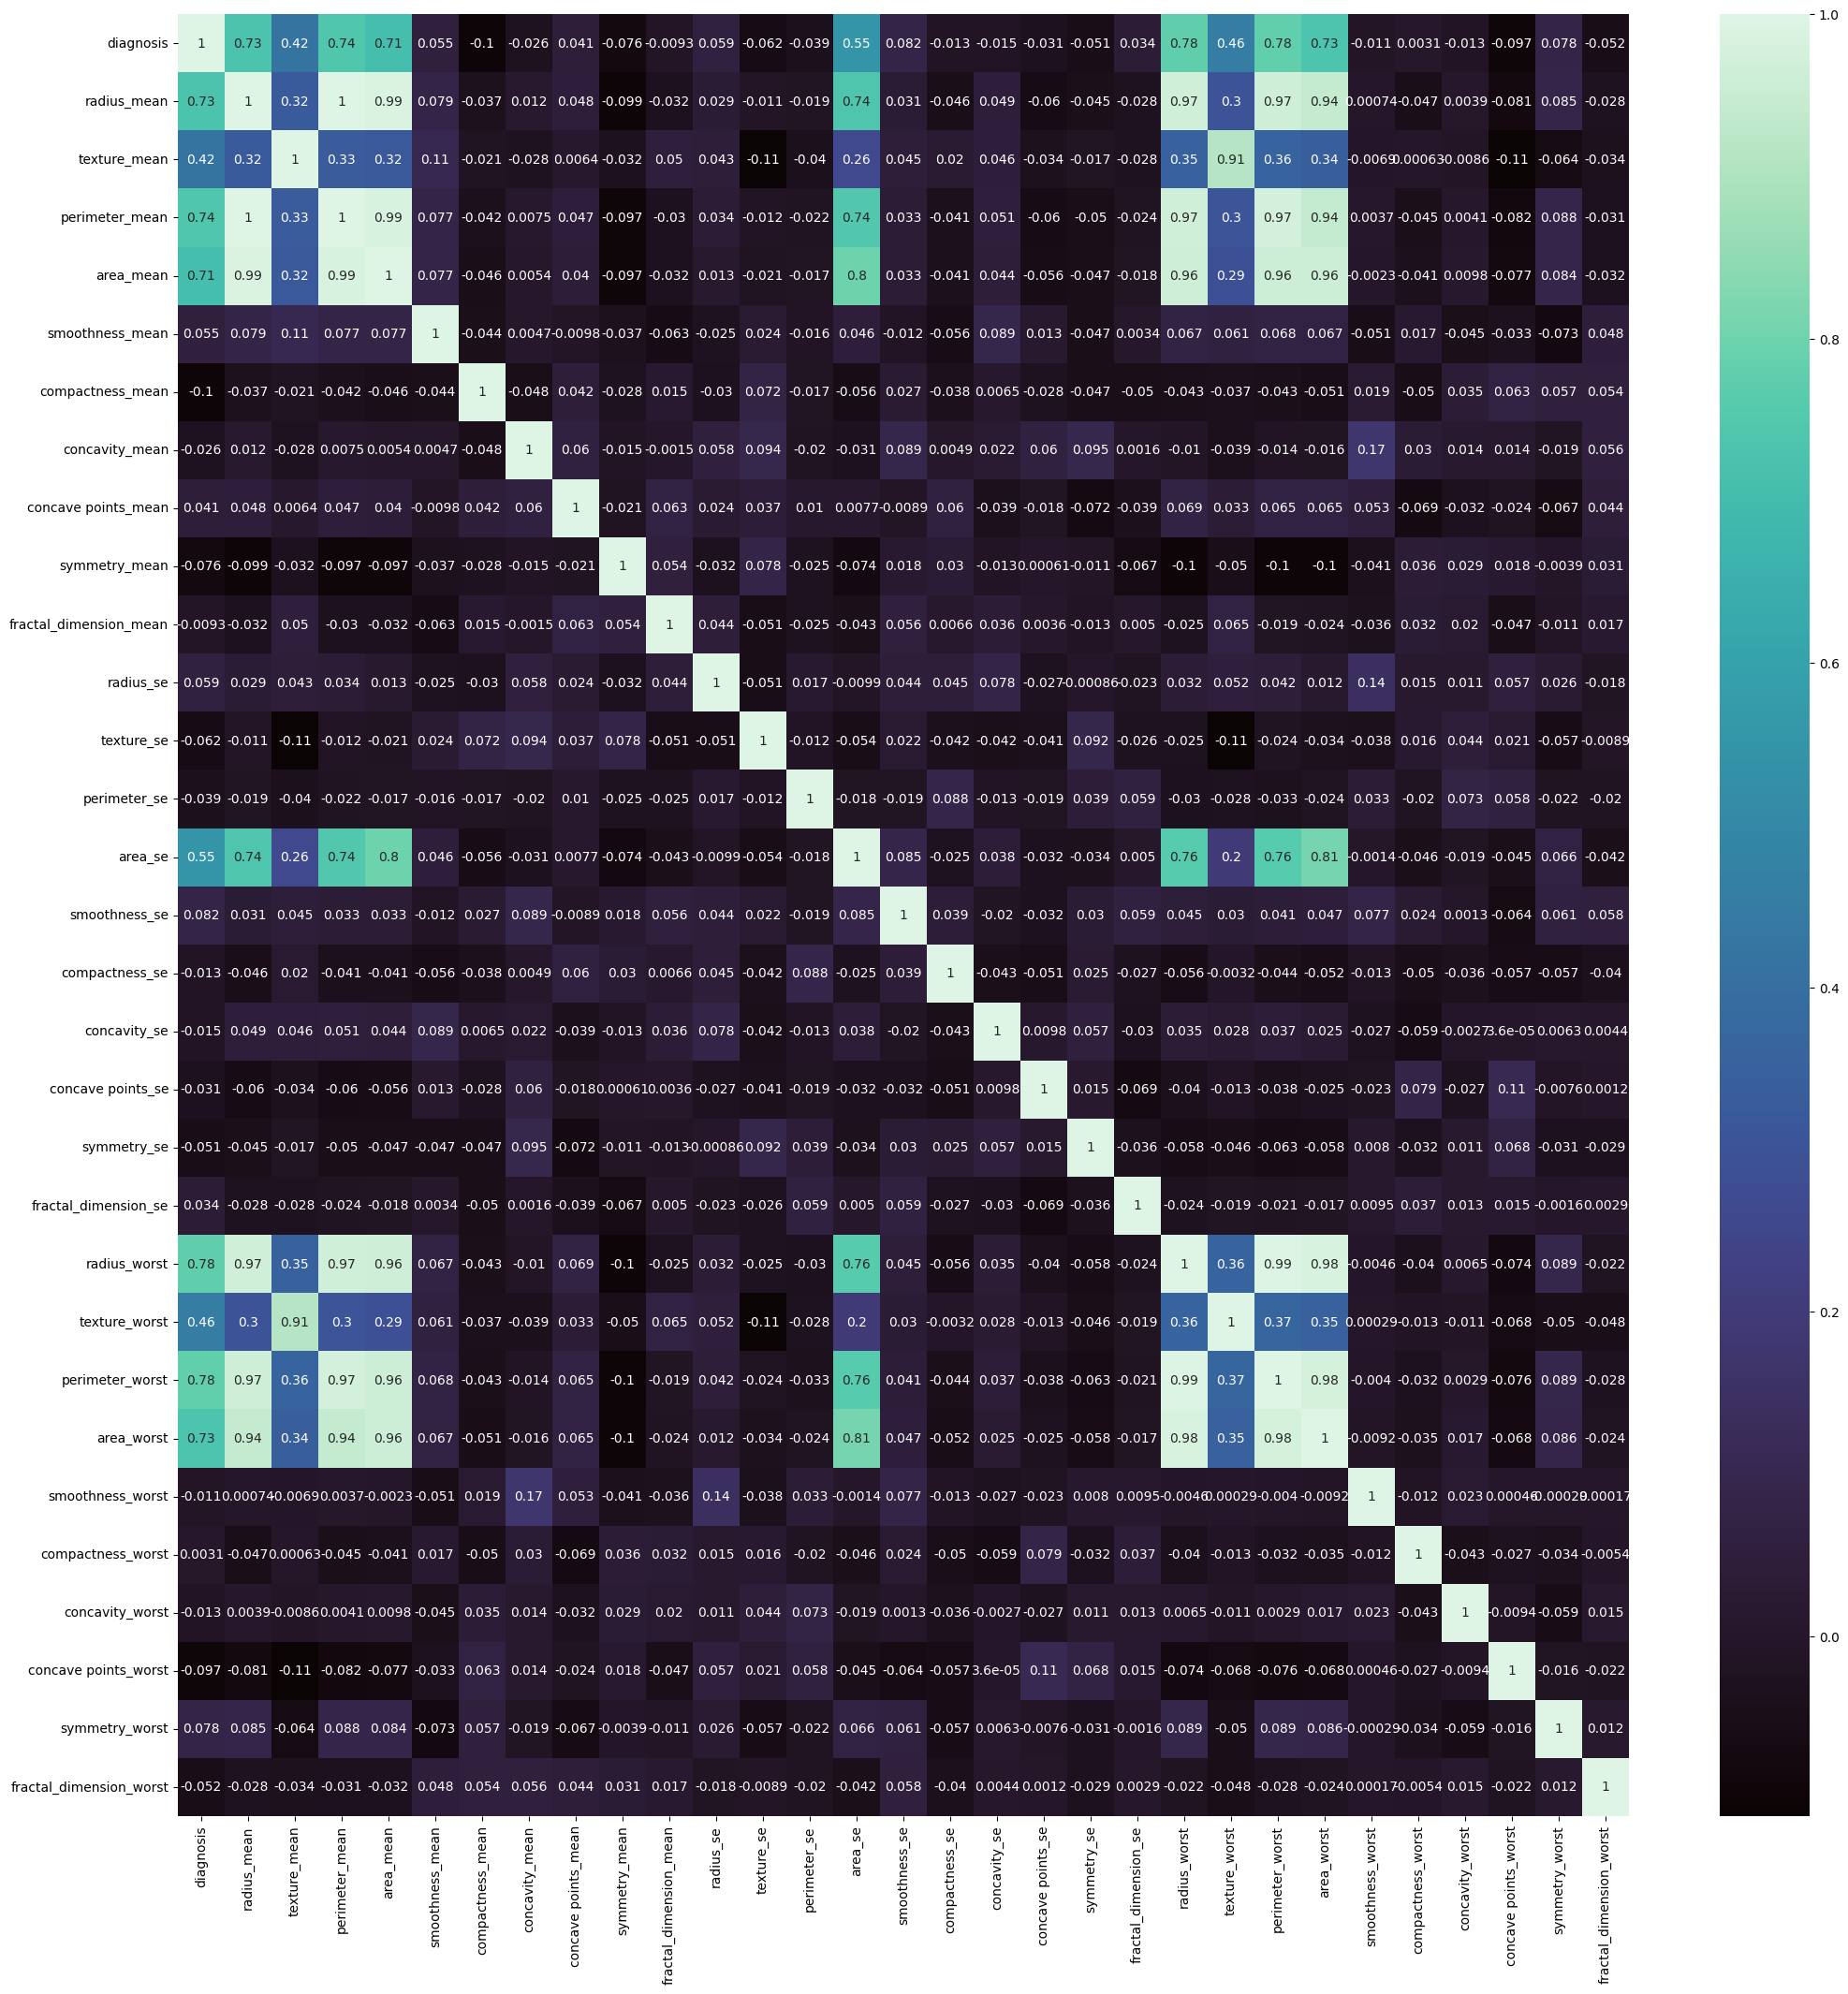

In [ ]:
#mapa de calor
plt.figure(figsize=(25,25))
sns.heatmap(correlation, annot=True, cmap='mako')

In [ ]:
# Remover diagnosis e adcionando ela a tabela y (separar quem é X e y)
# Dividir treino e teste( neste caso o treino será de 80% e 20% será do teste)
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Criar o modelo
modelo = LogisticRegression()

In [ ]:
# Treinar
modelo = LogisticRegression(class_weight='balanced', random_state=42)
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
# Fazer previsões
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]  # Probabilidade da classe 1

In [ ]:
# Avaliar
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        71
         1.0       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
'''
Classe 0:

precision = 0.96 → o modelo acertou 96% das vezes que previu classe 0

recall = 1.00 → o modelo acertou 100% dos exemplos reais de classe 0

Classe 1:

precision = 1.00 → entre as previsões de classe 1, 100% estavam corretas

recall = 0.93 → o modelo acertou 93% dos exemplos reais de classe 1

A linha accuracy mostra o percentual total de acertos: 0.97 → 97% de acerto
geral.

total real da classe 0: 71 (support) (total da liha 0 matriz de confusão)
total real da classe 1: 43 (support) (total da liha 0 matriz de confusão)
total previsto da classe 0: 74 (total da coluna 0)
total previsto da classe 1: 40 (total da coluna 1)

tota1 de previsões certas na classe 0 (71)
total de previsões certas na classe 1 (40)

precision: total de previsões certas/total de previsões da classe (soma da coluna)
recall: tototal de previsões certas/ total real da classe

precision 0: 71 / 74 = 0.96
precision 1: 40 / 40 = 1.00
recall 0: 71 / 71 = 1.00
recall 1: 40 / 43 = 0.93

'''

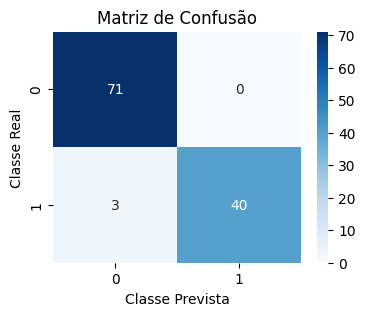

In [ ]:
# Matriz de Confusão
plt.figure(figsize=(4, 3))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.show()

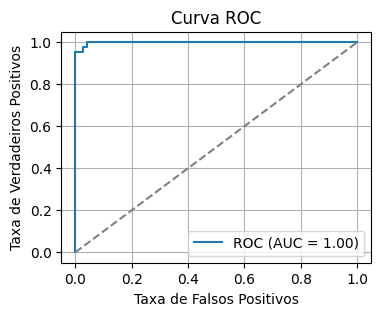

In [ ]:
# Curva ROC
plt.figure(figsize=(4,3))

# Converter y_test para o tipo numérico
y_test_numeric = y_test.astype(int)

# Usar y_test_numeric na função roc_curve
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Curva ROC")
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
'''
Relatorio Final:

Descrição do problema e do dataset escolhido:

O problema abordado neste projeto é a classificação de tumores de mama em malignos ou benignos,
com base em características quantitativas extraídas de imagens de núcleos celulares. Essa tarefa é
crítica para auxiliar no diagnóstico médico, onde a identificação precisa de casos malignos
pode salvar vidas, enquanto falsos negativos (malignos classificados erroneamente como benignos)
representam um risco grave.


O dataset utilizado para teste foi o Breast Cancer Wisconsin Diagnostic Dataset

link: https://www.kaggle.com/code/eslamhani/breast-cancer-wisconsin-diagnostic/input




Explicação das etapas de preparação dos dados:

Apliquei um df.info para ver como estavam os dados, o que precisaria fazer para poder consumir,
mas o database ja estava quase pronto para uso, tive que converter os valores
da coluna diagnosis (variável dependente "y") em binario: Benigno B para 0
e Maligno M para 1, realizar drop da coluna "id". A divisão foi de 80% para treino
e 20% para teste, e fiz um teste sem o balanceamento e depois com o balanceamento
do modelo para um resultado sem viés.



Resultados da regressão logística e interpretação:
OBS: resultados atualizados apos o balanceamento.

O modelo da regressão logistica foi treinado e avaliado e apresentou esses resultados:
precision 0: 71 / 74 = 0.96(96%)
precision 1: 40 / 40 = 1.00(100%)
recall 0: 71 / 71 = 1.00(100%)
recall 1: 40 / 43 = 0.93(93%)



Avaliação do modelo e conclusão sobre sua performance:

Para a classe benigna (0), o modelo teve um excelente desempenho, com precisão de 96% e recall de 100%.
Já para a classe maligna (1), o recall de 93% significa que, de 43 casos classificados como malignos,
3 foram identificados de forma errada como benignos. Portanto, mesmo com uma grande porcentagem de acerto,
o modelo apresenta pequenos resultados errôneos, e é necessário ter atenção para um diagnóstico ainda mais preciso,
para poder antecipar o tratamento e aumentar a chance de cura do câncer maligno. O modelo teve uma acurácia total de 97%
e uma precisão alta para as duas classes: 96% para benigno (0) e 100% para maligno (1). Contudo, alguns pacientes com
câncer maligno podem receber diagnósticos incorretos, o que poderia retardar o tratamento. Assim, o modelo pode ajudar,
mas existe uma pequena porcentagem de erro que pode fazer diferença.


O modelo se ajustou bem ao problema? O que poderia ser feito para melhorar?

Inicialmente, o modelo se ajustou bem ao problema, mas, devido à desproporção de casos benignos em relação aos malignos, ele
pode ter priorizado os casos benignos. Em um cenário real, um recall mais alto para os casos malignos seria ideal para oferecer
mais confiança e um suporte mais rápido aos pacientes diagnosticados com câncer maligno. Por isso, realizei o processo de balanceamento dos dados,
que teve uma maior eficiência nos resultados obtidos, aumentando a porcentagem de acerto tanto para as previsões quanto para o recall.
Com o tempo, percebo que é possível melhorar os treinamentos de modelos no geral. Entendi a lógica por trás do processo e reconheço que
a prática é essencial para o aperfeiçoamento. Os ajustes nos parâmetros foram fundamentais para a melhoria do modelo, mas essa eficácia
pode variar porque depende muito de caso para caso.
'''